# 🧠 Projet 1 : Analyse des ventes d’un e-commerce



## 🎯 Objectif  
Identifier les **produits performants**, les **comportements clients** et les **périodes fortes/faibles**.



## 📁 Données utilisées  

- `date_commande`  
- `produit`, `catégorie`  
- `quantité`, `prix_unitaire`  
- `client_id`, `région`, `revenu`  
- `canal` (web, mobile, magasin)  

👉 *Un jeu de données simulé est utilisé pour illustrer l'analyse.*

---

## 📊 Visualisations à inclure

| Objectif                                 | Type de graphique              |
|------------------------------------------|-------------------------------|
| Répartition des ventes par catégorie     | Histogramme / Pie chart       |
| Évolution des ventes dans le temps       | Line chart                    |
| Corrélation prix vs. quantité            | Scatter plot                  |
| Valeurs extrêmes dans les montants       | Boxplot                       |
| Activité par heure et par jour           | Heatmap                       |

---

## 🧠 Compétences métiers mobilisées

- ✅ Calcul des **KPI** : chiffre d'affaires, panier moyen  
- 📈 Détection de **saisonnalités** : pics de vente par semaine/jour  
- 👥 **Segmentation clients** : par région, revenu ou canal d’achat  
- 🥇 Analyse des **produits performants** : top ventes par catégorie  





















## 🔍 Étapes de l’analyse



### 1. Chargement des données (simulées)  
> On génère 1000 commandes aléatoires avec des champs typiques d’un site e-commerce.

---

In [6]:
import pandas as pd
import numpy as np

# 📦 Paramètres de base
np.random.seed(42)
n_commandes = 400  # nombre total de commandes
max_produits_par_commande = 5  # une commande peut contenir 1 à 5 produits

# 🗓 Dates de commande
dates = pd.date_range("2024-01-01", "2024-06-30").to_list()

# 👥 Clients
client_ids = np.random.choice(range(1000, 1100), size=n_commandes, replace=True)
regions = ["Nord", "Sud", "Est", "Ouest"]
revenus_par_région = {
    "Nord": (2200, 400),
    "Sud": (2800, 600),
    "Est": (2000, 300),
    "Ouest": (2500, 500)
}

# 📦 Produits et catégories
produits_info = {
    "T-shirt": ("Homme", 10, 25),
    "Pantalon": ("Homme", 30, 60),
    "Chaussures": ("Femme", 50, 100),
    "Sac": ("Femme", 20, 50),
    "Veste": ("Enfant", 40, 90)
}
produits = list(produits_info.keys())

# 📑 Liste des lignes de commande
lignes = []

commande_id = 1
for i in range(n_commandes):
    date = np.random.choice(dates)
    client = client_ids[i]
    region = np.random.choice(regions)
    canal = np.random.choice(["web", "mobile", "magasin"], p=[0.4, 0.3, 0.3])

    revenu = max(1000, np.random.normal(*revenus_par_région[region]))  # pas de revenu < 1000
    nb_produits = np.random.randint(1, max_produits_par_commande + 1)
    produits_disponibles = np.random.choice(produits, size=nb_produits, replace=False)

    heure = np.random.randint(8, 22)

    for produit in produits_disponibles:
        categorie, prix_min, prix_max = produits_info[produit]
        prix = np.round(np.random.uniform(prix_min, prix_max), 2)
        quantite = np.random.randint(1, 4) if prix < 50 else 1
        montant = prix * quantite

        lignes.append({
            "commande_id": commande_id,
            "date_commande": date,
            "produit": produit,
            "categorie": categorie,
            "quantité": quantite,
            "prix_unitaire": prix,
            "montant_commande": montant,
            "client_id": client,
            "région": region,
            "revenu": np.round(revenu, 2),
            "canal": canal,
            "jour_semaine": date.strftime("%A"),
            "heure_commande": heure
        })

    commande_id += 1

# 📊 Création du DataFrame final
df = pd.DataFrame(lignes)

# ✅ Aperçu
df.head()


,commande_id,date_commande,produit,categorie,quantité,prix_unitaire,montant_commande,client_id,région,revenu,canal,jour_semaine,heure_commande
0,1,2024-05-06,Sac,Femme,3,44.28,132.84,1051,Est,2264.85,web,Monday,17
1,2,2024-02-19,Sac,Femme,2,25.83,51.66,1092,Nord,2020.28,mobile,Monday,20
2,2,2024-02-19,Veste,Enfant,1,79.79,79.79,1092,Nord,2020.28,mobile,Monday,20
3,2,2024-02-19,T-shirt,Homme,3,23.35,70.05,1092,Nord,2020.28,mobile,Monday,20
4,2,2024-02-19,Chaussures,Femme,1,51.38,51.38,1092,Nord,2020.28,mobile,Monday,20



### 2. Visualisation 1 : Répartition des ventes par catégorie  
- 📊 **Histogramme horizontal** : total des ventes par catégorie  
- 🥧 **Camembert** : part de chaque catégorie dans le chiffre d'affaires global  


<ipython-input-14-431f5bb7171e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ca_par_categorie.values, y=ca_par_categorie.index, palette="Blues_d")


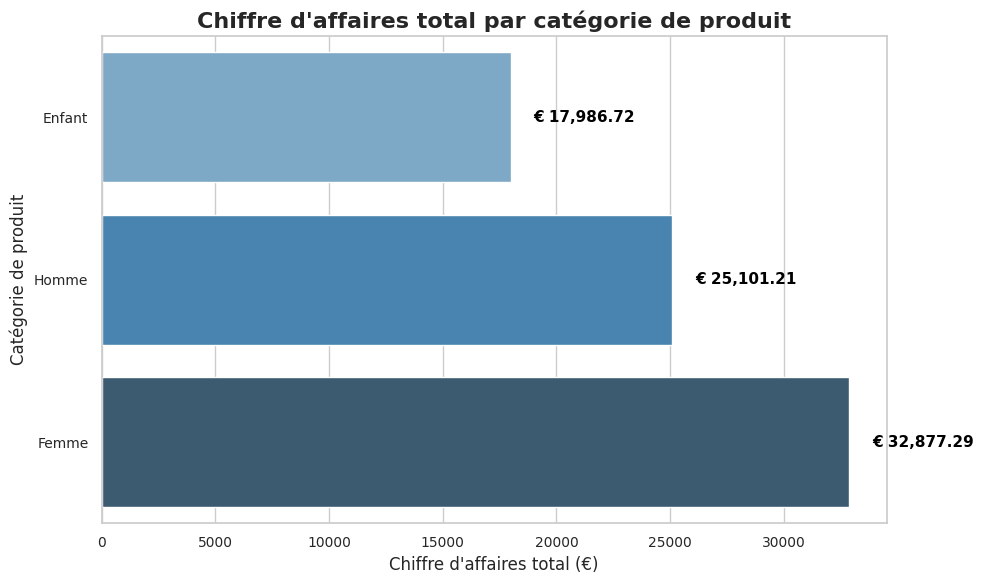

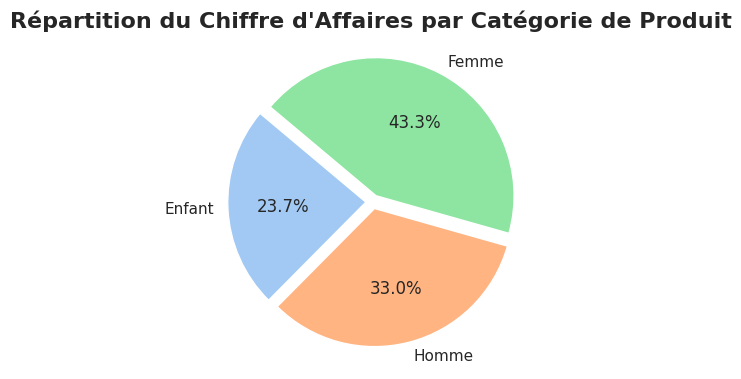

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)

# 🔢 Agrégation du CA par catégorie
ca_par_categorie = df.groupby("categorie")["montant_commande"].sum().sort_values()

# 📊 1. Histogramme horizontal avec plus de détails
plt.figure(figsize=(10, 6))
sns.barplot(x=ca_par_categorie.values, y=ca_par_categorie.index, palette="Blues_d")
plt.title("Chiffre d'affaires total par catégorie de produit", fontsize=16, weight='bold')
plt.xlabel("Chiffre d'affaires total (€)", fontsize=12)
plt.ylabel("Catégorie de produit", fontsize=12)
plt.tick_params(axis='both', labelsize=10)

# Ajouter des valeurs sur les barres
for index, value in enumerate(ca_par_categorie.values):
    plt.text(value + 1000, index, f'€ {value:,.2f}', va='center', fontweight='bold', fontsize=11, color="black")

plt.tight_layout()
plt.show()

# 🥧 2. Camembert avec légendes et annotations
plt.figure(figsize=(4, 4))
plt.pie(ca_par_categorie.values,
        labels=ca_par_categorie.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel"),
        explode=[0.05]*len(ca_par_categorie))

plt.title("Répartition du Chiffre d'Affaires par Catégorie de Produit", fontsize=16, weight='bold')
plt.axis("equal")  # cercle parfait
plt.tight_layout()
plt.show()



### 3. Visualisation 2 : Évolution du CA dans le temps  
- 📈 **Courbe temporelle** du chiffre d’affaires quotidien  
- 📌 Repérage des **tendances**, **pics** et **creux**  

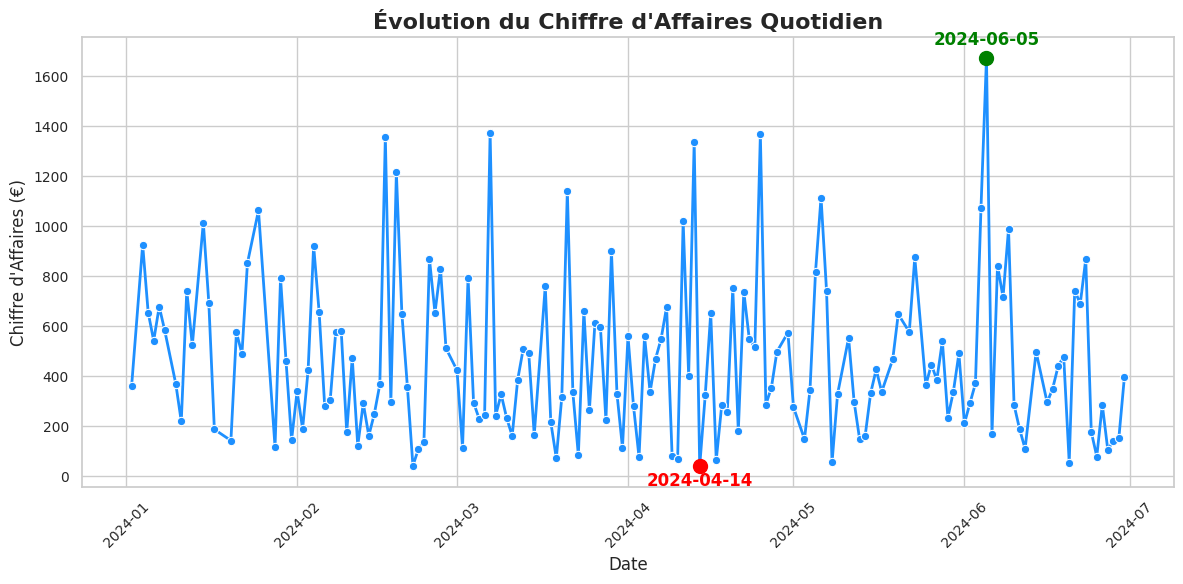

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔢 Agrégation du CA par jour
ca_par_jour = df.groupby("date_commande")["montant_commande"].sum()

# 📈 Courbe temporelle du Chiffre d'Affaires
plt.figure(figsize=(12, 6))
sns.lineplot(x=ca_par_jour.index, y=ca_par_jour.values, marker="o", color="dodgerblue", linewidth=2)

# 🏷️ Ajouter des titres et labels
plt.title("Évolution du Chiffre d'Affaires Quotidien", fontsize=16, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Chiffre d'Affaires (€)", fontsize=12)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.tick_params(axis='both', labelsize=10)

# 📌 Repérage des pics et creux
max_ca = ca_par_jour.idxmax()
min_ca = ca_par_jour.idxmin()
max_value = ca_par_jour.max()
min_value = ca_par_jour.min()

# Points max et min avec des couleurs spécifiques
plt.scatter(max_ca, max_value, color='green', s=100, label=f"Pic: {max_ca.strftime('%Y-%m-%d')}", zorder=5)
plt.scatter(min_ca, min_value, color='red', s=100, label=f"Creux: {min_ca.strftime('%Y-%m-%d')}", zorder=5)

# Affichage des dates sur les points
plt.text(max_ca, max_value + 50, f"{max_ca.strftime('%Y-%m-%d')}", color="green", ha='center', fontsize=12, weight='bold')
plt.text(min_ca, min_value - 80, f"{min_ca.strftime('%Y-%m-%d')}", color="red", ha='center', fontsize=12, weight='bold')

# Affichage de la courbe
plt.tight_layout()
plt.show()


### 4. Visualisation 3 : Corrélation prix / quantité
- 🔍 Scatter plot pour observer si les produits moins chers sont achetés en plus grande quantité

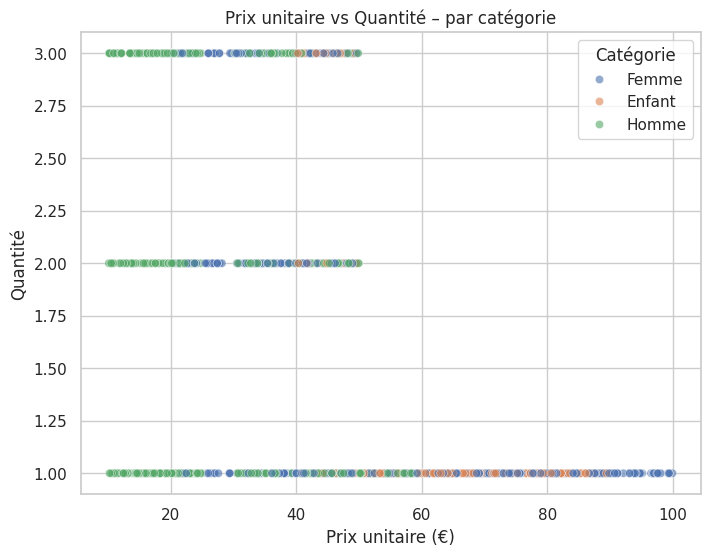

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='prix_unitaire', y='quantité', hue='categorie', alpha=0.6)
plt.title("Prix unitaire vs Quantité – par catégorie")
plt.xlabel("Prix unitaire (€)")
plt.ylabel("Quantité")
plt.legend(title='Catégorie')
plt.show()


### 5. Visualisation 4 : Valeurs extrêmes
- 📦 Boxplot par catégorie pour identifier des paniers anormalement élevés ou faibles

In [54]:
# 🆔 S'assurer d’avoir un identifiant de commande
# Si tu n’en as pas encore, on crée un identifiant unique de commande par regroupement logique
df['commande_id'] = df.groupby(['client_id', 'date_commande', 'heure_commande']).ngroup()

# 💰 Calcul du montant total par commande
df_commande = df.groupby('commande_id').agg({
    'montant_commande': 'sum',
    'client_id': 'first',
    'région': 'first',
    'canal': 'first',
    'date_commande': 'first',
    'heure_commande': 'first'
}).reset_index()

# 🖥️ Aperçu
df_commande.head()

# 📦 Calcul du montant de commande à partir de df
df["montant_ligne"] = df["quantité"] * df["prix_unitaire"]

# ✅ Générer les revenus clients s'ils n'existent pas déjà
if "revenu" not in df.columns:
    revenus_clients = pd.DataFrame({
        "client_id": df["client_id"].unique(),
        "revenu": np.random.normal(loc=2500, scale=800, size=len(df["client_id"].unique())).round(2)
    })
    revenus_clients["revenu"] = revenus_clients["revenu"].clip(lower=500)
    df = df.merge(revenus_clients, on="client_id", how="left")

# 🧾 Agréger au niveau commande
df_commande = df.groupby("commande_id").agg({
    "date_commande": "first",
    "client_id": "first",
    "région": "first",
    "canal": "first",
    "heure_commande": "first",
    'categorie': lambda x: x.mode()[0],  # catégorie dominante
    "montant_ligne": "sum",
    "revenu": "first"
}).reset_index().rename(columns={"montant_ligne": "montant_commande"})

# 🕒 Ajout du jour de la semaine
df_commande["jour_semaine"] = df_commande["date_commande"].dt.day_name()

# ✅ Vérification
df_commande.head()

,commande_id,date_commande,client_id,région,canal,heure_commande,categorie,montant_commande,revenu,jour_semaine
0,0,2024-03-10,1000,Ouest,mobile,17,Homme,233.48,2356.20,Sunday
1,1,2024-03-17,1000,Est,magasin,20,Femme,304.86,1538.10,Sunday
2,2,2024-04-15,1000,Nord,mobile,17,Enfant,164.58,2895.54,Monday
3,3,2024-05-19,1000,Est,magasin,20,Homme,14.87,2332.50,Sunday
4,4,2024-06-02,1000,Ouest,mobile,15,Femme,292.86,2831.00,Sunday


<ipython-input-55-2d47e2325169>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_commande, x='categorie', y='montant_commande', palette='Pastel1')


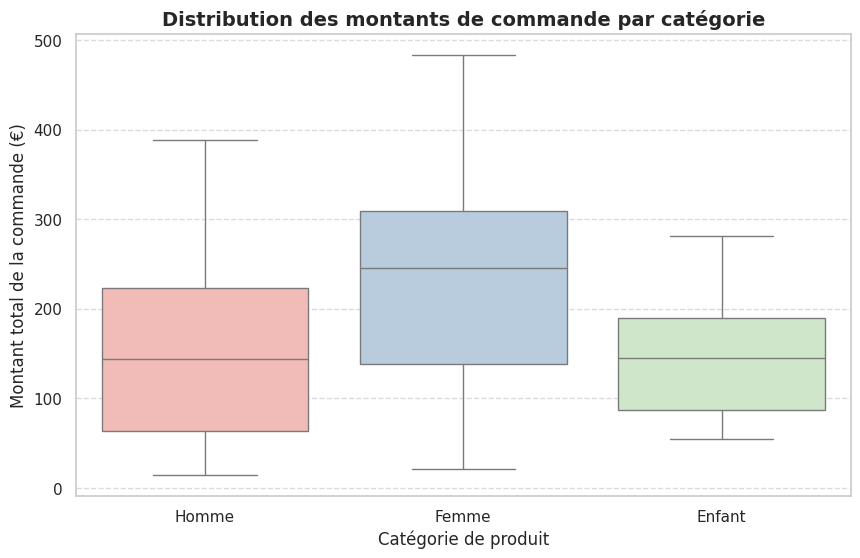

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_commande, x='categorie', y='montant_commande', palette='Pastel1')

plt.title("Distribution des montants de commande par catégorie", fontsize=14, weight='bold')
plt.xlabel("Catégorie de produit", fontsize=12)
plt.ylabel("Montant total de la commande (€)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()




### 6. Visualisation 5 : Activité par jour et heure  
- 🔥 **Heatmap** croisant le jour de la semaine et l’heure de la commande  
- Permet de détecter les **pics horaires d'activité**


<ipython-input-56-3dd0c6215259>:20: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


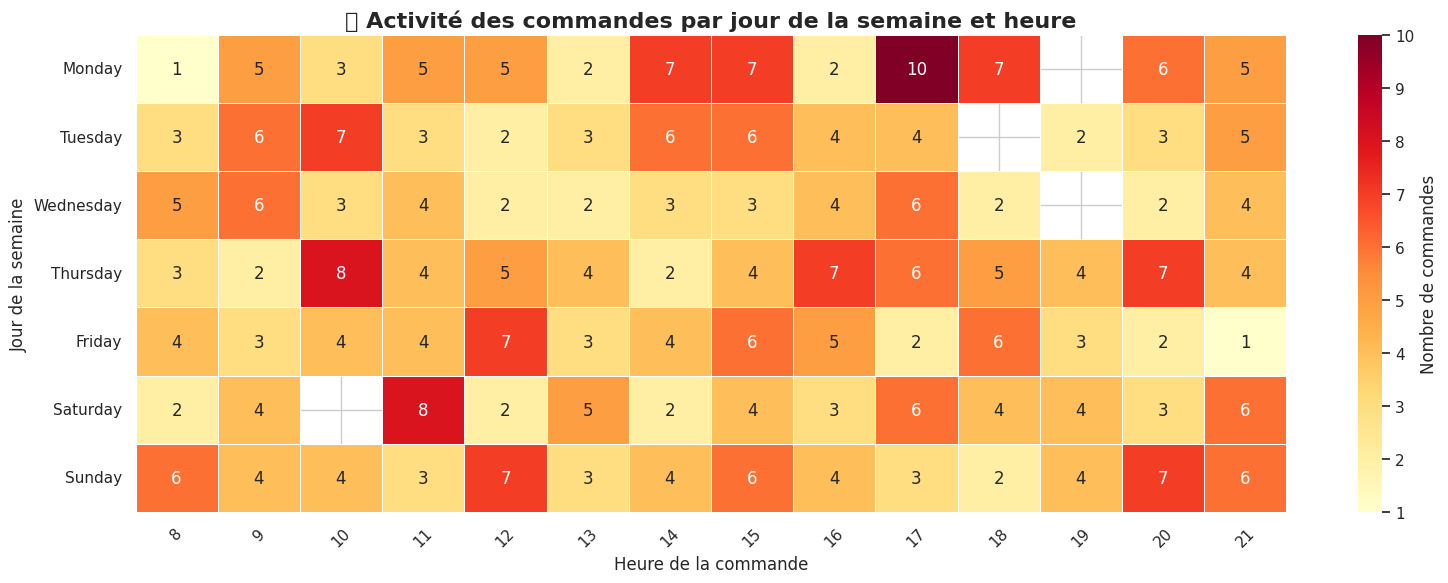

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🧮 Comptage du nombre de commandes par jour et heure
heatmap_data = df_commande.groupby(['jour_semaine', 'heure_commande']).size().reset_index(name='nb_commandes')

# 🔁 Réorganisation pour la heatmap
jours_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_data.pivot(index='jour_semaine', columns='heure_commande', values='nb_commandes').reindex(jours_order)

# 🔥 Affichage de la heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_pivot, cmap="YlOrRd", linewidths=0.5, annot=True, fmt=".0f", cbar_kws={'label': 'Nombre de commandes'})

plt.title("🔥 Activité des commandes par jour de la semaine et heure", fontsize=16, weight='bold')
plt.xlabel("Heure de la commande", fontsize=12)
plt.ylabel("Jour de la semaine", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 7. Indicateurs clés (KPI)
- 💰 Chiffre d’affaires total
- 📦 Nombre de commandes
- 🛒 Panier moyen

In [58]:
import pandas as pd

# Création d'une colonne "montant" pour chaque ligne
df['montant'] = df['quantité'] * df['prix_unitaire']

# 💰 Chiffre d'affaires total
chiffre_affaires_total = df['montant'].sum()

# 📦 Nombre de commandes (en supposant qu’une ligne = une commande)
nombre_commandes = df.shape[0]

# 🛒 Panier moyen
panier_moyen = chiffre_affaires_total / nombre_commandes

# 📋 Affichage des KPI
print("💰 Chiffre d'affaires total : {:.2f} €".format(chiffre_affaires_total))
print("📦 Nombre de commandes : {}".format(nombre_commandes))
print("🛒 Panier moyen : {:.2f} €".format(panier_moyen))


💰 Chiffre d'affaires total : 75965.22 €
📦 Nombre de commandes : 1169
🛒 Panier moyen : 64.98 €


### 8. Analyse de saisonnalité
- 📅 Ventes hebdomadaires pour détecter une logique de saison ou l’impact de campagnes promotionnelles

<ipython-input-59-4b1c04039e3b>:21: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


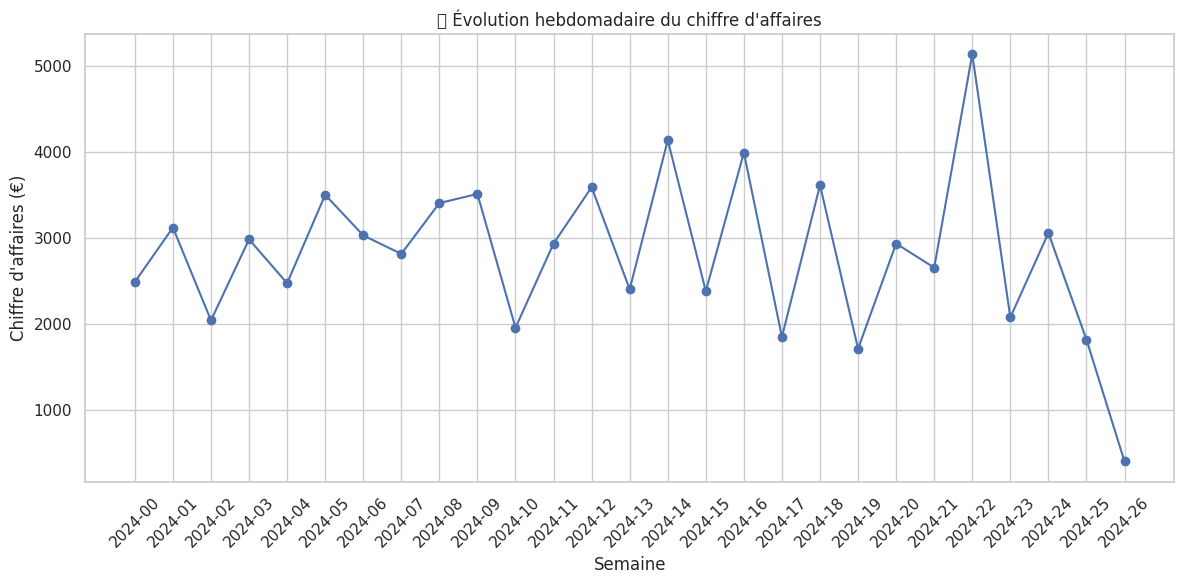

In [59]:
import matplotlib.pyplot as plt

# S'assurer que la colonne 'date_commande' est bien au format datetime
df['date_commande'] = pd.to_datetime(df['date_commande'])

# Extraire la semaine et l'année de chaque commande
df['annee_semaine'] = df['date_commande'].dt.strftime('%Y-%U')  # ex: '2024-17'

# Recalcul du chiffre d'affaires par semaine
df['montant'] = df['quantité'] * df['prix_unitaire']
ca_hebdo = df.groupby('annee_semaine')['montant'].sum().reset_index()

# Tracer l’évolution du chiffre d’affaires hebdomadaire
plt.figure(figsize=(12, 6))
plt.plot(ca_hebdo['annee_semaine'], ca_hebdo['montant'], marker='o', linestyle='-')
plt.title("📅 Évolution hebdomadaire du chiffre d'affaires")
plt.xlabel("Semaine")
plt.ylabel("Chiffre d'affaires (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
